In [397]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt

import matplotlib as mpl

import numpy as np

plt.style.use('ggplot')

pd.__version__

u'0.17.0'

In [398]:
SSF_subsidies = pd.read_csv("SSF_subsidies.csv")
countries = pd.read_csv("Country_Data.csv")
catch = pd.read_csv("SAU_Catches.csv")
type_EEZ = pd.read_csv("Subtype_Fleet_EEZ.csv")
all_subsidies = pd.read_csv("Subsidies2009.csv")

In [399]:
SSF_subsidies.groupby(['SubType']).sum()

,ID,Cnumber,RegionID,total_subsidies,NewData,Developed,HDI_2005,SSFsubsidies_assessed_percent,Data_group,SSF_totalCatch_EEZ_percent,%SSF_totalCatch_Country,SSF_USD_1000,Ref
SubType,,,,,,,,,,,,,
Boat constsruct. & renov.,79159,34169,198,3168111.751967,19,25,50.789,776.600000,100,2432.7,2362.2,496065.797143,NaN
Fisher assistance,79663,34169,198,1931994.599198,23,25,50.789,842.720000,67,2432.7,2362.2,476792.297825,NaN
Fisheries dev. projects,79231,34169,198,939904.440623,52,25,50.789,2032.258864,127,2432.7,2362.2,220795.191027,NaN
Fisheries mangt.,78943,34169,198,6930751.048183,22,25,50.789,2063.143562,180,2432.7,2362.2,1740794.880568,NaN
Fishery R&D,79015,34169,198,2594717.863325,17,25,50.789,1622.736036,151,2432.7,2362.2,525599.315180,NaN
Fishing access,79519,34169,198,901778.521137,12,25,50.789,0.000000,44,2432.7,2362.2,0.000000,NaN
Fishing port develop.,79303,34169,198,3453075.017371,5,25,50.789,418.200000,53,2432.7,2362.2,720078.691000,NaN
Fuel subsidies,81305,34899,206,7389833.298575,26,26,54.559,816.900000,NaN,2432.7,2362.2,244723.200000,NaN
MPAs,79087,34169,198,1161063.546486,1,25,50.789,2066.100000,191,2432.7,2362.2,240875.185291,NaN


In [400]:
catch.groupby(['EEZ']).sum()

,Developed,Recreational,Subsistence,Artisanal,Industrial,total_catch,SSF_catch
EEZ,,,,,,,
False,41,823.0,3620.34,22764.82,82864.25,110072.6,26385.2
True,41,818.5,3609.56,22727.97,79156.04,106312.0,26337.5


In [401]:


SSF_subsidies['SSF_subsidies_percent'] = SSF_subsidies['SSF_USD_1000']/SSF_subsidies['total_subsidies']


#  merge original all subsidies data with to align with subsidy 
#  type and whether the EEZ catch data or the FLeet catch data apply, 
#  see type_EEZ data, this is in preparation to later merge with SAU_catch data 

subsidies_type = pd.merge(
    left=all_subsidies,
    right=type_EEZ,
    how='left'
)


#  now this needs to be merged with country data to have coordinates per country
#  and have each country data point assigned to a subregion (thanks to Andres data)

subsidies_type_countries = pd.merge(
    left=subsidies_type,
    right=countries,
    how='left'
)


#  calculate SSF catch percent by dividing SSF catch / total catch

catch['SSF_catch_percent']=catch['SSF_catch']/catch['total_catch']


#  merge with SSF catch from SAU_catch data

subsidies_type_countries_catch = pd.merge(
    left=subsidies_type_countries,
    right=catch, how='left'
)

#  calculating mean SSF catch per subregion, 
#  needed to use to fill gaps for SSF subsidies that have not been assessed

catch_countries = pd.merge(
    left=catch, 
    right=countries, 
    how='left'
)

In [402]:

catch_by_subregion = catch_countries.groupby(['Subregion']).sum()
catch_by_subregion['SSF_subregion_catch'] = (
    catch_by_subregion['SSF_catch']/catch_by_subregion['total_catch']
)

catch_by_subregion = catch_by_subregion.reset_index()

SSF_subregion_catch = catch_by_subregion.loc[:,['Subregion','SSF_subregion_catch']]



#  merging mean catch with all subsidies data
subsidies_type_countries_catch_meancatch = pd.merge(
    left=subsidies_type_countries_catch,right=SSF_subregion_catch, how='left'
) 

#  preparing SSF subsidies by merging with country data
SSF_subsidies_countries = pd.merge(
    left=SSF_subsidies,right=countries, how='left')

#  from SSF subsidies assessed calculate mean per subregion and per type 
#  to fill gaps of countries that have not been assessed
SSF_by_subregion = SSF_subsidies_countries.groupby(
    ['Subregion','Type']).sum(
)


SSF_by_subregion['SSF_subsidies_subregion'] = (
    SSF_by_subregion['SSF_USD_1000']/SSF_by_subregion['total_subsidies']
)
SSF_by_subregion = SSF_by_subregion.reset_index()
SSF_subsidies_subregion = SSF_by_subregion.loc[:,['Subregion','Type','SSF_subsidies_subregion']]


In [403]:

#  as not all subsidies types are covered by countries assessed, 
#  mean values for region are being calculated to replace the empty cells
SSF_by_region = SSF_subsidies_countries.groupby(
    ['RegionName','Type']).sum(
)
SSF_by_region['SSF_subsidies_region'] = (
    SSF_by_region['SSF_USD_1000']/SSF_by_region['total_subsidies']
)
SSF_by_region = SSF_by_region.reset_index()
SSF_subsidies_region = SSF_by_region.loc[
    :,['RegionName','Type','SSF_subsidies_region']
]

#  merge mean subsidies by type and subregion to all subsidies data
catch_subsidies_subregion = pd.merge(
    left=subsidies_type_countries_catch_meancatch,right=SSF_subsidies_subregion, how='left'
)


#  merge mean subsidies by type and region to all subsidies data that now have included total subsidies per subregion
catch_subsidies_subregion_region = pd.merge(
    left=catch_subsidies_subregion,right=SSF_subsidies_region, how='left'
)

#  fill gaps from mean subsidies per subregion with mean subsidies per region and name new column ['subsidies_subregion_all']

#  create new column and name ['SSF_subsidies_true] and state true for all values > 0 

catch_subsidies_subregion_region['total_subsidies_true'] = np.where(
    catch_subsidies_subregion_region['total_subsidies'] > 0, True, False
)
    
def check_data(index=0):
    df = catch_subsidies_subregion_region
    print("ssf all: {}, total: {}".format(df['total_subsidies_true'][index], df['total_subsidies'][index]))
    
check_data(1946)

#  make a new column that states True for NaN in subsidies per subregion and name ['total_subregion_NaN']

catch_subsidies_subregion_region['total_subregion_NaN'] = pd.isnull(catch_subsidies_subregion_region['SSF_subsidies_subregion'])


def check_data(index=0):
    print("ssf all: {}, total: {}".format(catch_subsidies_subregion_region['SSF_subsidies_subregion'][index], catch_subsidies_subregion_region['total_subregion_NaN'][index]))
    
check_data(1946)



ssf all: True, total: 26849.2514743
ssf all: 0.0, total: False


In [404]:
#  create a new column that states True when ['total_subregion_NaN'] is True and ['SSF_subsidies_true] is True
#  name new column ['total_subregion_all']
#  this shows when True that there is a total subsidy for that category 
#  but no value from total subregion subsidy data and therefore we will replace with the total region value

catch_subsidies_subregion_region['total_subregion_all'] = np.where((catch_subsidies_subregion_region['total_subsidies_true'] == True) & (catch_subsidies_subregion_region['total_subregion_NaN'] == True), True, False)


def check_data(index=0):
    print("ssf all: {0}, total: {1}, isNaN: {2}".format(catch_subsidies_subregion_region['total_subregion_all'][index],catch_subsidies_subregion_region['total_subsidies_true'][index], catch_subsidies_subregion_region['total_subregion_NaN'][index]))

check_data(1056)

ssf all: False, total: True, isNaN: False


In [405]:
#  create new column and name ['subsidies_subregion_all'] to use value from subregion or from region
#  when ['total_subregion_all'] is true use region data when false use subregion data


#  catch_subsidies_subregion_region['subsidies_subregion_all'] = 
#  np.where(catch_subsidies_subregion_region['total_subregion_all'] == True, 
#  catch_subsidies_subregion_region['SSF_subsidies_region'], 
#  catch_subsidies_subregion_region['SSF_subsidies_subregion'])


catch_subsidies_subregion_region['subsidies_subregion_all'] = np.where(catch_subsidies_subregion_region['total_subregion_all'] == True, catch_subsidies_subregion_region['SSF_subsidies_region'], catch_subsidies_subregion_region['SSF_subsidies_subregion'])

catch_subsidies_subregion_region

def check_data(index=0):
    print("ssf all: {0}, total: {1}, isNaN: {2}".format(catch_subsidies_subregion_region['subsidies_subregion_all'][index],catch_subsidies_subregion_region['total_subregion_all'][index], catch_subsidies_subregion_region['SSF_subsidies_region'][index]))

check_data(1146)

ssf all: 0.345222623209, total: False, isNaN: 0.211431702815


In [406]:
np.sum(catch_subsidies_subregion_region['total_subsidies'])

35371111.003231212

In [407]:
#  toshorten the create dataframe, creat subsidies1 that only include at this point relevant columns

subsidies1 = catch_subsidies_subregion_region.loc[:,['RegionName','Subregion','Countries','CLon', 'CLat','SIDS',
       'TotPop', 'HDI', 'Developed', 'GDP','Category','SubType','Type','EEZ', 'total_subsidies','SSF_catch_percent','SSF_subregion_catch','subsidies_subregion_all']]

#  create a new column 'Factor' and calculate as adjustment value for total subsidies per subregion and total SSF catch per subregion 
#  used to fill gaps for country that have not been assessed, this is done per subsidy subtype also

subsidies1['Factor'] = subsidies1['SSF_catch_percent']/subsidies1['SSF_subregion_catch']

#  multiply the "Factor" value with the mean subsidy value per subregion
#  to estimate the value for SSF subsidies per subsidy type for the countries that have not been assessed
subsidies1['SSF_subsidies_estimates'] = subsidies1['Factor']*subsidies1['subsidies_subregion_all']


#  to make sure none of the estimated values exceed 1 (100%) the SSF_subsidies_estimate will be capped at 1

subsidies1['SSF_subsidies_estimates_big'] = subsidies1['SSF_subsidies_estimates'] > 1

subsidies1['SSF_estimates_corrected'] = np.where(subsidies1['SSF_subsidies_estimates_big'] == True, 1, subsidies1['SSF_subsidies_estimates'])

def check_data(index=0):
    print("ssf_estimates: {0}, ssf_big: {1}, SSF_corrected: {2}".format(subsidies1['SSF_subsidies_estimates'][index],subsidies1['SSF_subsidies_estimates_big'][index], subsidies1['SSF_estimates_corrected'][index]))

check_data(1002)


ssf_estimates: 1.11444766273, ssf_big: True, SSF_corrected: 1.0


In [408]:
#  shorten SSF subsidy data, that contains originally assessed SSF subsidy values

SSF_subsidies_short = SSF_subsidies_countries.loc[:,[
        'Countries','Type','SSFsubsidies_assessed_percent','weighted_by_sectorsize',
        'Data_group','SSF_USD_1000','SSF_subsidies_percent']
                                                 ]


#  merge estimated values for subsidies with SSF assessed subsidies data
SSF_subsidies_estimates_assessed = pd.merge(
    left=subsidies1,right=SSF_subsidies_short,how='left'
)

#  use fillna function to use estimated values for SSF subsidies to fill gaps of countries that have not been assessed
SSF_subsidies_estimates_assessed['SSF_subsidies_percent_all'] = SSF_subsidies_estimates_assessed[
    'SSF_subsidies_percent'].fillna(
    SSF_subsidies_estimates_assessed['SSF_estimates_corrected']
)

#  calculate USD values for all SSF for all subtypes and countries form the estimated and assessed percentages
SSF_subsidies_estimates_assessed['SSF_subsidies_USD'] = (
    SSF_subsidies_estimates_assessed['total_subsidies']
)*SSF_subsidies_estimates_assessed['SSF_subsidies_percent_all']

#  rename column names to make it easy for visualization and graphs and calculate LSF subsidies

SSF_subsidies_estimates_assessed = SSF_subsidies_estimates_assessed.rename(columns={'SSF_subsidies_USD':'SSF subsidies'})

SSF_subsidies_estimates_assessed['LSF subsidies'] = SSF_subsidies_estimates_assessed['total_subsidies'] - SSF_subsidies_estimates_assessed['SSF subsidies']

SSF_subsidies_estimates_assessed.to_csv('SSF_subsidies_all.csv')

print np.sum(SSF_subsidies_estimates_assessed['SSF subsidies'])
print np.sum(SSF_subsidies_estimates_assessed['total_subsidies'])
print np.sum(SSF_subsidies_estimates_assessed['LSF subsidies'])

subsidies1.to_csv('check_subsidies1.csv')

5445304.53278
35371111.0032
29925806.4704


In [409]:
35371111.0032-5105976.14144

30265134.86176

In [410]:

SSFglobalpercent = np.sum(SSF_subsidies_estimates_assessed['SSF subsidies'])/np.sum(catch_subsidies_subregion_region['total_subsidies'])*100

SSFglobalpercent

15.394779463632061

In [411]:

#  prepare for plotting global subsidies per category

Subsidies_per_Category = SSF_subsidies_estimates_assessed.groupby(['Category']).sum()

Subsidies_per_Category['SSF percent'] = Subsidies_per_Category['SSF subsidies']/Subsidies_per_Category['total_subsidies']*100
print Subsidies_per_Category['SSF percent']
Subsidies_per_Category_short = Subsidies_per_Category.loc[:,['LSF subsidies', 'SSF subsidies','total_subsidies']]

Subsidies_per_Category_short['check'] = Subsidies_per_Category_short['LSF subsidies'] + Subsidies_per_Category_short['SSF subsidies']
Subsidies_per_Category_short

Category
Ambiguous             14.828275
Beneficial            24.313215
Capacity-enhancing    10.601348
Name: SSF percent, dtype: float64


,LSF subsidies,SSF subsidies,total_subsidies,check
Category,,,,
Ambiguous,3564946.465656,620652.036003,4185598.501659,4185598.501659
Beneficial,8382192.841631,2692650.478517,11074843.320149,11074843.320149
Capacity-enhancing,17978667.163160,2132002.018264,20110669.181424,20110669.181424


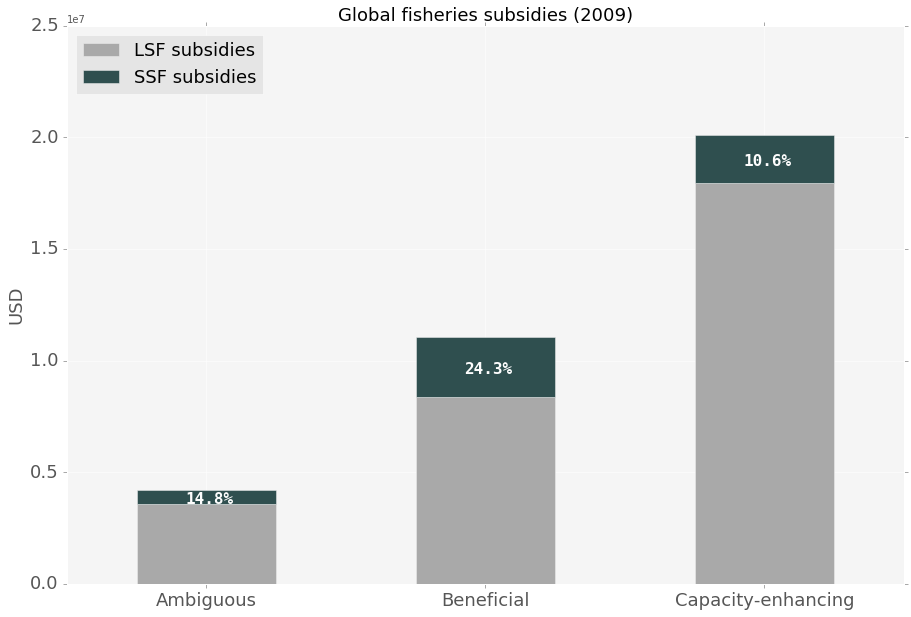

In [412]:

data = Subsidies_per_Category[['LSF subsidies','SSF subsidies']]
data_dict = data.to_dict()


# these percentages are the SSF percent out of the total subsidie calculated in Subsidies_per_Category['SSF percent']
SSFpercent = (
    {'label': 'Ambiguous', 'percentage': 14.8}, 
    {'label': 'Beneficial', 'percentage': 24.3},
    {'label': 'Capacity-enhancing', 'percentage': 10.6}
)

# add totals to SFFpercent
for key, val in data_dict.items():
    for k, v in data_dict[key].items():
        for i in SSFpercent:
            if i['label'] == k:
                if 'total' in i.keys():
                    i['total'] += v
                else:
                    i['total'] = v

# print("data_dict {}".format(data_dict))


# create subplot
ax = data.plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"])
ax.set_title("Global fisheries subsidies (2009)", fontsize=18)
ax.set_ylabel("USD",fontsize=18)
ax.set_xlabel("",fontsize=18)
ax.set_xticklabels(['Ambiguous','Beneficial', 'Capacity-enhancing'],rotation=360, fontsize=18)
ax.set_axis_bgcolor('0.96')


# get an ordered list of percentages
percentages = []
for item in SSFpercent:
    for k, v in item.items():
        if k == 'percentage':
            percentages.append(v)

# prepare rects
N = len(SSFpercent)
indexes = np.arange(N)
width = 0.02
rects = ax.bar(indexes, percentages, width)

# iterate rects and map index with SSF percentage
for index, rect in enumerate(rects):
    SSFpercent[index]['rect_x'] = rect.get_x() 


# now we have a single object holding 
# all the values we need to label the chart 
for bar in SSFpercent:
    #  get percenatage label as a string
    percentage = bar['percentage']
    #  get value of to of bar
    height = bar['total']
    label_position = height - ((height / 100 * percentage) / 2)
    #  position text lables
    ax.text(
        bar['rect_x'] + width/2,
        label_position  - 12.4**5, str(percentage) + '%',
        ha="center",
        family="monospace",
        fontsize=16,
        fontweight="bold",
        color="white"
    )


plt.savefig('Subsidies_Category.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Category.pdf', dpi=400, bbox_inches='tight')
plt.legend(loc=2,fontsize=18)
plt.show()

In [413]:
SSF_subsidies_estimates_assessed.columns.values

array(['RegionName', 'Subregion', 'Countries', 'CLon', 'CLat', 'SIDS',
       'TotPop', 'HDI', 'Developed', 'GDP', 'Category', 'SubType', 'Type',
       'EEZ', 'total_subsidies', 'SSF_catch_percent',
       'SSF_subregion_catch', 'subsidies_subregion_all', 'Factor',
       'SSF_subsidies_estimates', 'SSF_subsidies_estimates_big',
       'SSF_estimates_corrected', 'SSFsubsidies_assessed_percent',
       'weighted_by_sectorsize', 'Data_group', 'SSF_USD_1000',
       'SSF_subsidies_percent', 'SSF_subsidies_percent_all',
       'SSF subsidies', 'LSF subsidies'], dtype=object)

In [414]:
SSF_subsidies_estimates_assessed.replace(to_replace='Developed', value=1)
SSF = SSF_subsidies_estimates_assessed.loc[[330],['Developed']]
SSF

,Developed
330,True


In [415]:
Subsidies_per_subtype = SSF_subsidies_estimates_assessed.groupby(['SubType']).sum()
Subsidies_per_subtype = Subsidies_per_subtype.sort_values(by=['total_subsidies'],ascending=False)

Subsidies_per_subtype['SSF percent'] = Subsidies_per_subtype['SSF subsidies']/Subsidies_per_subtype['total_subsidies']*100
Subsidies_per_subtype_milions = Subsidies_per_subtype.loc[:,['LSF subsidies','SSF subsidies']]
Subsidies_per_subtype_milions['LSF subsidies'] = Subsidies_per_subtype_milions['LSF subsidies']/1000000
Subsidies_per_subtype_milions['SSF subsidies'] = Subsidies_per_subtype_milions['SSF subsidies']/1000000

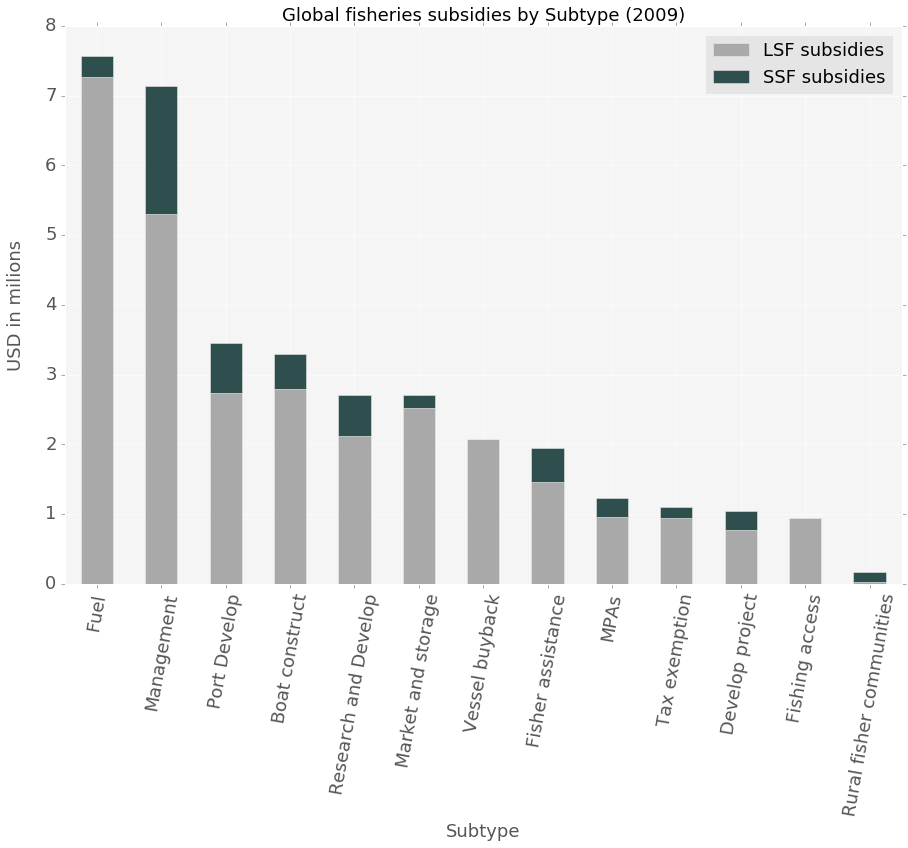

In [416]:
ax = Subsidies_per_subtype_milions[['LSF subsidies','SSF subsidies']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"] )
ax.set_title("Global fisheries subsidies by Subtype (2009)", fontsize=18)
ax.set_ylabel("USD in milions",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("Subtype",fontsize=18)
ax.set_xticklabels(['Fuel', 'Management','Port Develop','Boat construct','Research and Develop','Market and storage','Vessel buyback','Fisher assistance','MPAs','Tax exemption','Develop project','Fishing access','Rural fisher communities'],rotation=80, fontsize=18)
ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)
plt.savefig('Subsidies_Subtype.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Subtype.pdf', dpi=400, bbox_inches='tight')

plt.show()

In [417]:
Subtypes = Subsidies_per_subtype.loc[:,['SSF percent', 'SSF subsidies','total_subsidies']]
Subtypes.to_csv('subtypes.csv')

In [418]:
Developed_subtype = SSF_subsidies_estimates_assessed.groupby(['SubType','Developed']).sum()

Developed_short = Developed_subtype.loc[:,['SSF subsidies']]
Developed = Developed_short.reset_index()

Developed_pivot = Developed.pivot_table(['SSF subsidies'], index=['SubType'], columns='Developed')

Developed_pivot.to_csv('Developed_pivot.csv')
Developed_sorted = pd.read_csv('Developed_pivot_sorted.csv')
print Developed_sorted['SubType']

0              Fisheries mangt.
1         Fishing port develop.
2                   Fishery R&D
3     Boat constsruct. & renov.
4             Fisher assistance
5                Fuel subsidies
6                          MPAs
7       Fisheries dev. projects
8     Markt. & storage infrast.
9                 Tax exemption
10     Rural fisher communities
11               Fishing access
12               Vessel buyback
Name: SubType, dtype: object


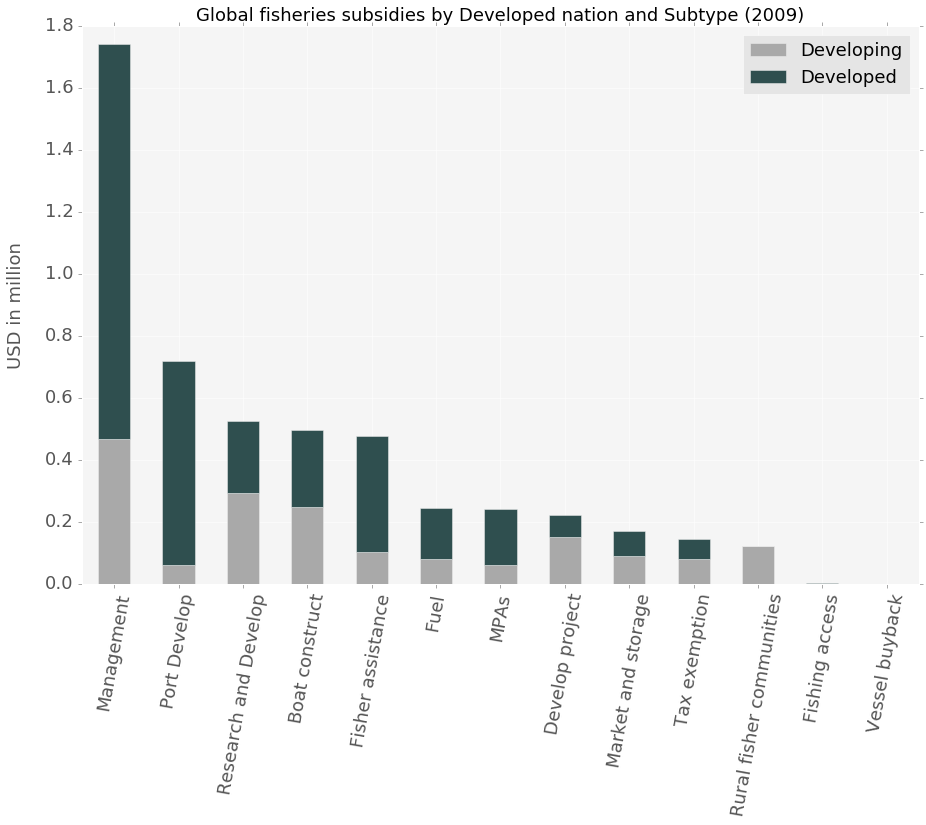

In [419]:
ax = Developed_sorted[['Developing','Developed']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"])
            
ax.set_title("Global fisheries subsidies by Developed nation and Subtype (2009)", fontsize=18)
ax.set_ylabel("USD in million",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("",fontsize=18)

ax.set_xticklabels(['Management','Port Develop','Research and Develop','Boat construct','Fisher assistance','Fuel','MPAs','Develop project','Market and storage','Tax exemption','Rural fisher communities','Fishing access',
 'Vessel buyback'],rotation=80, fontsize=18)
ax.set_axis_bgcolor('0.96')

ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)


plt.show()

In [420]:
305.0/138.0

2.210144927536232

In [421]:
SSF_subsidies_estimates_assessed.columns.values

array(['RegionName', 'Subregion', 'Countries', 'CLon', 'CLat', 'SIDS',
       'TotPop', 'HDI', 'Developed', 'GDP', 'Category', 'SubType', 'Type',
       'EEZ', 'total_subsidies', 'SSF_catch_percent',
       'SSF_subregion_catch', 'subsidies_subregion_all', 'Factor',
       'SSF_subsidies_estimates', 'SSF_subsidies_estimates_big',
       'SSF_estimates_corrected', 'SSFsubsidies_assessed_percent',
       'weighted_by_sectorsize', 'Data_group', 'SSF_USD_1000',
       'SSF_subsidies_percent', 'SSF_subsidies_percent_all',
       'SSF subsidies', 'LSF subsidies'], dtype=object)

In [422]:
Subsidies_per_region = SSF_subsidies_estimates_assessed.groupby(['RegionName']).sum()
Subsidies_per_region['LSF subsidies'] = Subsidies_per_region['LSF subsidies']/1000000
Subsidies_per_region['SSF subsidies'] = Subsidies_per_region['SSF subsidies']/1000000
Subsidies_per_region = Subsidies_per_region.sort_values(by=['total_subsidies'],ascending=False)
Subsidies_per_region['SSF percent'] = (Subsidies_per_region['SSF subsidies']/(Subsidies_per_region['total_subsidies']/1000000)) *100
Subsidies_per_region['SSF percent'] 

RegionName
Asia                                     18.589692
Europe                                    7.000836
North America                            18.768241
Oceania                                   4.243141
South, Central America and Carribbean    30.890012
Africa                                   32.260159
Name: SSF percent, dtype: float64

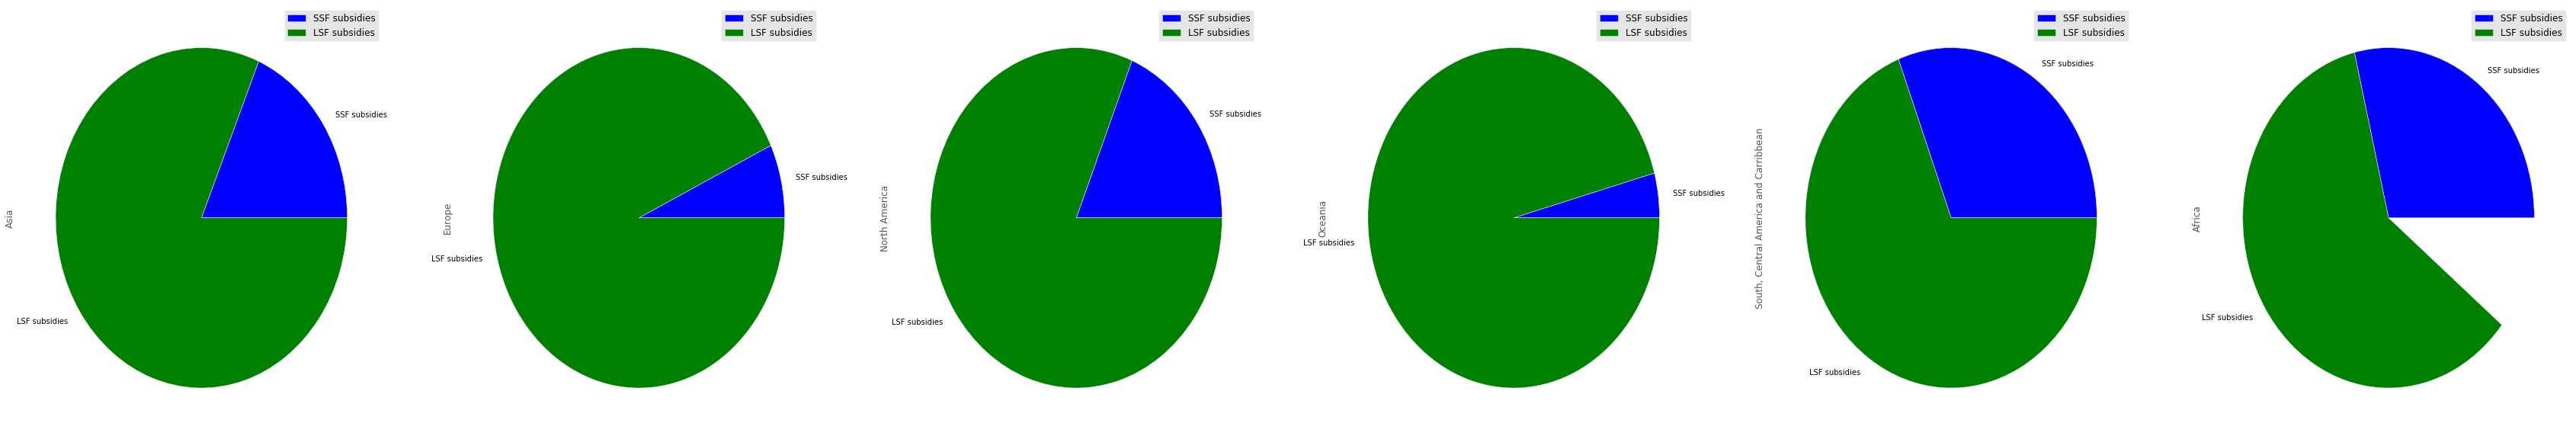

In [423]:
regions_transposed = Subsidies_per_region.loc[:,['SSF subsidies','LSF subsidies']].transpose()
# how to make , color=["darkgray","darkslategrey"]?
ax = regions_transposed.plot(kind='pie', subplots=True, figsize=(60, 10,))

plt.savefig('regions_pie.svg', dpi=400, bbox_inches='tight')
plt.show()

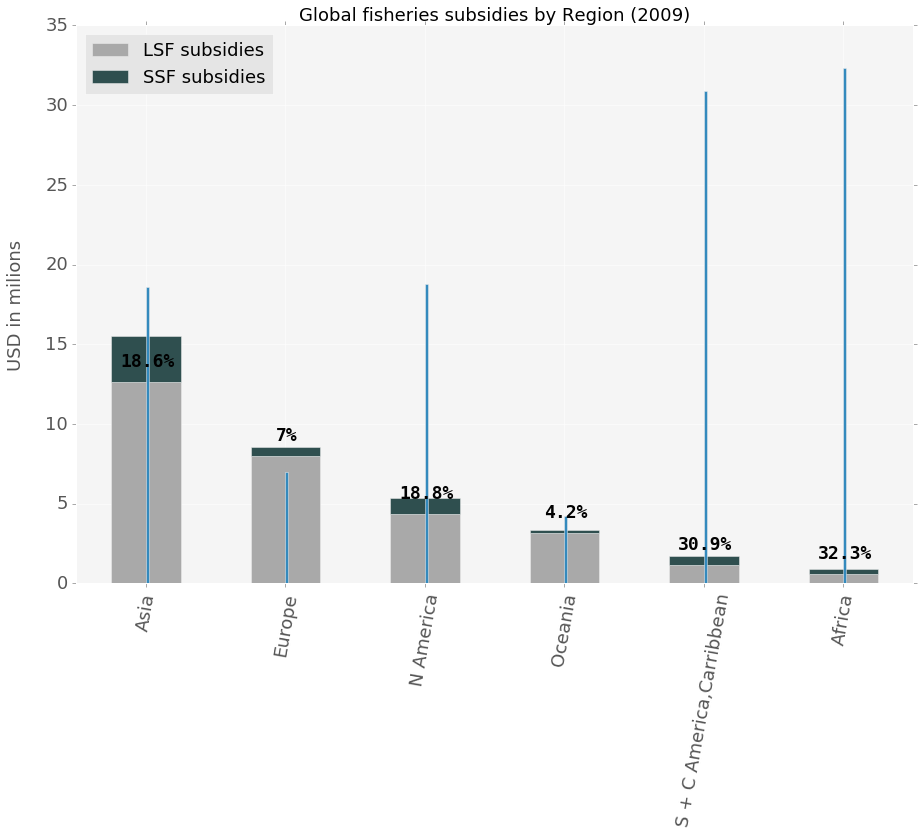

In [424]:

data = Subsidies_per_region[['LSF subsidies','SSF subsidies']]
data_dict = data.to_dict()


# these percentages are the SSF percent out of the total subsidies calculated in Subsidies_per_region['SSF percent']
SSFpercent = (
    {'label': 'Asia', 'percentage': 18.6}, 
    {'label': 'Europe', 'percentage': 7},
    {'label': 'North America', 'percentage': 18.8},
    {'label': 'Oceania', 'percentage': 4.2},
    {'label': 'South, Central America and Carribbean', 'percentage': 30.9},
    {'label': 'Africa', 'percentage': 32.3}
)

# add totals to SFFpercent
for key, val in data_dict.items():
    for k, v in data_dict[key].items():
        for i in SSFpercent:
            #  print("i = {}, k = {}".format(i, k))
            if i['label'] == k:
                if 'total' in i.keys():
                    i['total'] += v
                else:
                    i['total'] = v

# make plot (also called subplot)
ax = data[['LSF subsidies','SSF subsidies']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"] )
ax.set_title("Global fisheries subsidies by Region (2009)", fontsize=18)
ax.set_ylabel("USD in milions",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("",fontsize=18)
ax.set_xticklabels(['Asia', 'Europe','N America','Oceania','S + C America,Carribbean', 'Africa'],rotation=80, fontsize=18)
ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)


# get an ordered list of percentages
percentages = []
for item in SSFpercent:
    for k, v in item.items():
        if k == 'percentage':
            percentages.append(v)
            
# prepare rects (rectangles)
N = len(SSFpercent)
indexes = np.arange(N)
width = 0.02
rects = ax.bar(indexes, percentages, width)

# iterate rects and map index with SSF percentage
for index, rect in enumerate(rects):
    SSFpercent[index]['rect_x'] = rect.get_x() 

    # now we have a single object holding 
# all the values we need to label the chart 
for bar in SSFpercent:
    #print bar
    #  get percentage label as a string
    percentage = bar['percentage']
    #  get value of to of bar
    height = bar['total']
    label_position = height - ((height / 100 * percentage))
    #  position text lables
    ax.text(
        bar['rect_x'] + width/2,
        label_position  + 1**5, str(percentage) + '%',
        ha="center",
        family="monospace",
        fontsize=18,
        fontweight="bold",
        color="black"
    )

    


plt.show()

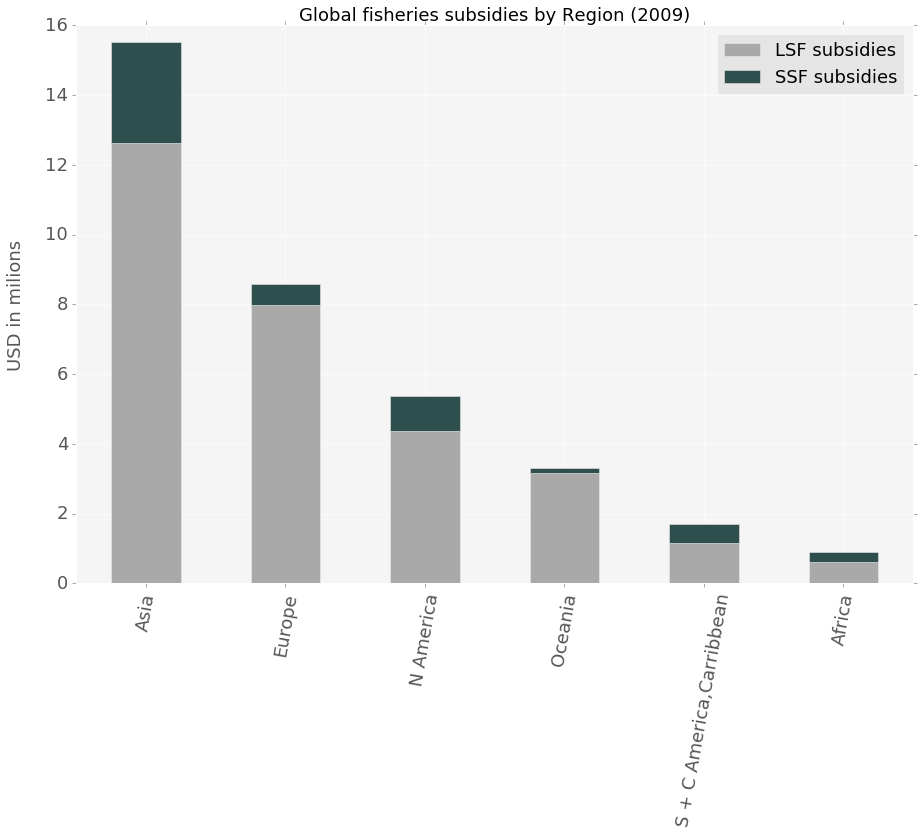

In [425]:
ax = data[['LSF subsidies','SSF subsidies']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"] )
ax.set_title("Global fisheries subsidies by Region (2009)", fontsize=18)
ax.set_ylabel("USD in milions",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("",fontsize=18)
ax.set_xticklabels(['Asia', 'Europe','N America','Oceania','S + C America,Carribbean', 'Africa'],rotation=80, fontsize=18)
ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)

plt.savefig('Subsidies_Region.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Region.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [426]:
Subsidies_per_developed = SSF_subsidies_estimates_assessed.groupby(['Developed']).sum()
Subsidies_per_developed

,CLon,CLat,SIDS,TotPop,HDI,GDP,EEZ,total_subsidies,SSF_catch_percent,SSF_subregion_catch,...,SSF_subsidies_estimates,SSF_subsidies_estimates_big,SSF_estimates_corrected,SSFsubsidies_assessed_percent,Data_group,SSF_USD_1000,SSF_subsidies_percent,SSF_subsidies_percent_all,SSF subsidies,LSF subsidies
Developed,,,,,,,,,,,,,,,,,,,,,
False,19316.608909,15789.526090,455,52180446890,893.659,402298501815600,330,12304224.252044,730.386712,550.165531,...,596.802711,212,463.620595,11674.626036,661,1752312.730827,116.742111,457.341534,2015355.555957,10288868.696087
True,16431.901070,18966.247989,26,33573525102,460.395,878717203000000,123,23066886.751188,125.081695,109.123008,...,98.509143,23,86.170512,3312.532425,529,3353663.410612,33.129677,86.328946,3429948.976827,19636937.774361


In [427]:
Subsidies_per_developed['SSF_percent'] = Subsidies_per_developed['SSF subsidies']/Subsidies_per_developed['total_subsidies']*100
Subsidies_per_developed['SSF_percent']

Developed
False    16.379379
True     14.869579
Name: SSF_percent, dtype: float64

In [428]:
Subsidies_developed_category = SSF_subsidies_estimates_assessed.groupby(['Developed','Category']).sum()
Subsidies_developed_category['SSF_percent'] = Subsidies_developed_category['SSF subsidies']/Subsidies_developed_category['total_subsidies']*100
Subsidies_developed_category['SSF_percent']

Developed  Category          
False      Ambiguous             51.469178
           Beneficial            26.463370
           Capacity-enhancing     9.825072
True       Ambiguous             10.259469
           Beneficial            23.240795
           Capacity-enhancing    11.130810
Name: SSF_percent, dtype: float64

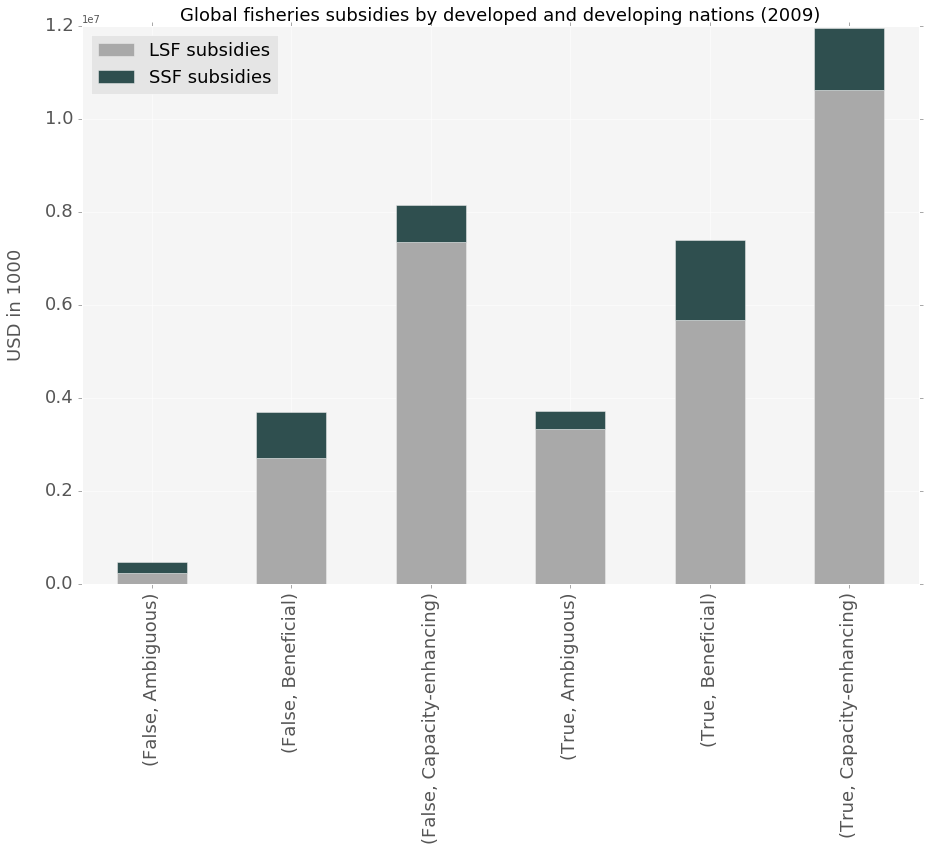

In [429]:
ax = Subsidies_developed_category[['LSF subsidies','SSF subsidies']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"] )
ax.set_title("Global fisheries subsidies by developed and developing nations (2009)", fontsize=18)
ax.set_ylabel("USD in 1000",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("",fontsize=18)

ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)
plt.savefig('Subsidies_developed_category.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_developed_category.pdf', dpi=400, bbox_inches='tight')

plt.show()

In [430]:
Subsidies_developed_category

CLon          CLat  SIDS       TotPop  \
Developed Category                                                            
False     Ambiguous            4457.678979   3643.736790   105  12041641590   
          Beneficial           4457.678979   3643.736790   105  12041641590   
          Capacity-enhancing  10401.250951   8502.052510   245  28097163710   
True      Ambiguous            3791.977170   4376.826459     6   7747736562   
          Beneficial           3791.977170   4376.826459     6   7747736562   
          Capacity-enhancing   8847.946730  10212.595071    14  18078051978   

                                  HDI              GDP  EEZ  total_subsidies  \
Developed Category                                                             
False     Ambiguous           206.229   92838115803600    0    464045.636732   
          Beneficial          206.229   92838115803600  330   3685527.321981   
          Capacity-enhancing  481.201  216622270208400    0   8154651.293331   
True      Ambiguous           106.245  202780893000000    0   3721552.864927   
          Beneficial          106.245  202780893000000  123   7389315.998168   
          Capacity-enhancing  247.905  473155417000000    0  11956017.888092   

                              SSF_catch_percent  SSF_subregion_catch  \
Developed Category                                                     
False     Ambiguous                  173.481403           126.961276   
          Beneficial                 152.115368           126.961276   
          Capacity-enhancing         404.789941           296.242978   
True      Ambiguous                   27.535140            25.182233   
          Beneficial                  33.297896            25.182233   
          Capacity-enhancing          64.248660            58.758543   

                                 ...       SSF_subsidies_estimates_big  \
Developed Category               ...                                     
False     Ambiguous              ...                                81   
          Beneficial             ...                                35   
          Capacity-enhancing     ...                                96   
True      Ambiguous              ...                                13   
          Beneficial             ...                                 6   
          Capacity-enhancing     ...                                 4   

                              SSF_estimates_corrected  \
Developed Category                                      
False     Ambiguous                        117.588996   
          Beneficial                       135.353524   
          Capacity-enhancing               210.678076   
True      Ambiguous                         20.277973   
          Beneficial                        35.388306   
          Capacity-enhancing                30.504233   

                              SSFsubsidies_assessed_percent  Data_group  \
Developed Category                                                        
False     Ambiguous                             3163.800000          80   
          Beneficial                            4289.486036         311   
          Capacity-enhancing                    4221.340000         270   
True      Ambiguous                              535.120000          98   
          Beneficial                            1462.493562         211   
          Capacity-enhancing                    1314.918864         220   

                                SSF_USD_1000  SSF_subsidies_percent  \
Developed Category                                                    
False     Ambiguous            224322.935000              31.638204   
          Beneficial           820022.249587              42.890291   
          Capacity-enhancing   707967.546240              42.213616   
True      Ambiguous            379556.913967               5.352447   
          Beneficial          1687247.131452              14.626688   
          Capacity-enhancing  1286859.3

In [431]:
Subsidies_per_Subregion = SSF_subsidies_estimates_assessed.groupby(['Subregion']).sum()
print Subsidies_per_Subregion.loc[:,['total_subsidies']]

                           total_subsidies
Subregion                                 
Australia and New Zealand    564700.848382
Caribbean                    112550.140879
Central America              325084.588497
Eastern Africa                54079.724644
Eastern Asia               10760535.260700
Eastern Europe              2897532.247149
Melanesia                    731943.389205
Micronesia                  2010780.434165
Middle Africa                180614.682603
Northern Africa              251084.114511
Northern America            5193399.599259
Northern Europe             2432070.155683
Polynesia                     11640.344323
South America               1444396.315945
Southeastern Asia           3231440.391499
Southern Africa              152681.598162
Southern Asia               1051873.886392
Southern Europe             2195230.799891
Western Africa               253191.796131
Western Asia                 474115.606082
Western Europe              1042165.079127


In [432]:
Subregions_all = Subsidies_per_Subregion.loc[:,['total_subsidies', 'SSF subsidies','LSF subsidies']]

Subregions_all_transposed = Subsidies_per_Subregion.loc[:,['SSF subsidies','LSF subsidies']].transpose()
Subregions_all_transposed

Subregion,Australia and New Zealand,Caribbean,Central America,Eastern Africa,Eastern Asia,Eastern Europe,Melanesia,Micronesia,Middle Africa,Northern Africa,...,Northern Europe,Polynesia,South America,Southeastern Asia,Southern Africa,Southern Asia,Southern Europe,Western Africa,Western Asia,Western Europe
SSF subsidies,81707.154000,77122.026306,86578.657304,22945.602045,1779574.793716,102740.639409,17691.530301,40142.673129,82957.338752,39448.035996,...,134323.266349,1291.265741,403795.382644,566116.259992,2730.181000,356346.673366,168741.546822,139567.169590,182133.217158,194021.023219
LSF subsidies,482993.694382,35428.114573,238505.931193,31134.122599,8980960.466984,2794791.607740,714251.858904,1970637.761037,97657.343852,211636.078515,...,2297746.889334,10349.078582,1040600.933301,2665324.131507,149951.417162,695527.213026,2026489.253069,113624.626541,291982.388923,848144.055908


Subregion      Australia and New Zealand
SSF subsidies               81707.154000
LSF subsidies              482993.694382


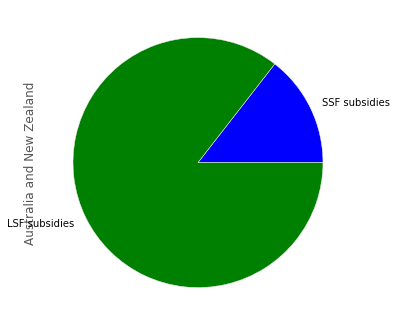

In [433]:
Australia = Subregions_all_transposed.loc[:,['Australia and New Zealand']]
print Australia
ax = Australia.plot(kind='pie', subplots=True, legend=False, figsize=(5.6, 5.6))
plt.savefig('Australia and NewZealand', dpi=400, bbox_inches='tight')

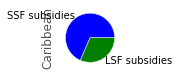

In [434]:
Caribbean = Subregions_all_transposed.loc[:,['Caribbean']]
ax = Caribbean.plot(kind='pie', subplots=True, legend=False, figsize=(1.1, 1.1))
plt.savefig('Caribbean', dpi=400, bbox_inches='tight')

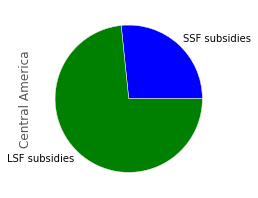

In [435]:
CentralAmerica = Subregions_all_transposed.loc[:,['Central America']]
ax = CentralAmerica.plot(kind='pie', subplots=True, legend=False, label=False, figsize=(3.3, 3.3))
plt.savefig('CentralAmerica', dpi=400, bbox_inches='tight')

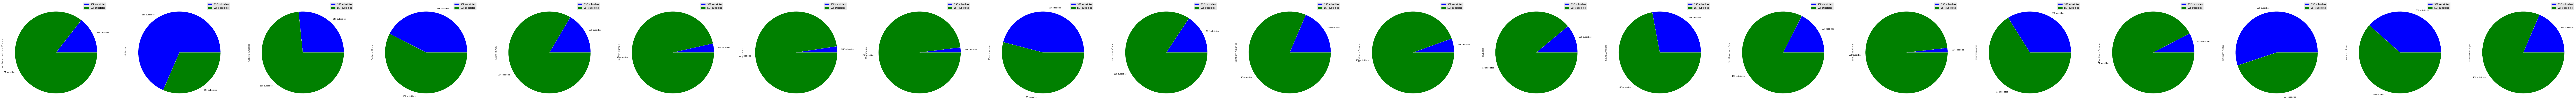

In [436]:
subregions_transposed = Subregions_all.loc[:,['SSF subsidies','LSF subsidies']].transpose()
# how to make , color=["darkgray","darkslategrey"]?
ax = subregions_transposed.plot(kind='pie', subplots=True, figsize=(250, 10,))

plt.savefig('Subsidies_pie.svg', dpi=400, bbox_inches='tight')

In [437]:
#  Subsidies_per_Subregion['total_size'] = Subsidies_per_Subregion['total_subsidies']/100000
#  Subsidies_per_Subregion['total_size'] 
Subregions_all.to_csv('Subsidies_per_Subregion.csv')

In [438]:
SSF_subsidies_estimates_assessed

,RegionName,Subregion,Countries,CLon,CLat,SIDS,TotPop,HDI,Developed,GDP,...,SSF_subsidies_estimates_big,SSF_estimates_corrected,SSFsubsidies_assessed_percent,weighted_by_sectorsize,Data_group,SSF_USD_1000,SSF_subsidies_percent,SSF_subsidies_percent_all,SSF subsidies,LSF subsidies
0,Europe,Southern Europe,Albania,20.050049,40.934006,0,3020209,0.749,False,30660000000,...,False,0.113328,NaN,NaN,NaN,NaN,NaN,0.113328,43.887323,343.373412
1,Europe,Southern Europe,Albania,20.050049,40.934006,0,3020209,0.749,False,30660000000,...,False,0.097732,NaN,NaN,NaN,NaN,NaN,0.097732,19.405425,179.152076
2,Europe,Southern Europe,Albania,20.050049,40.934006,0,3020209,0.749,False,30660000000,...,False,0.123532,NaN,NaN,NaN,NaN,NaN,0.123532,7.281209,51.660606
3,Europe,Southern Europe,Albania,20.050049,40.934006,0,3020209,0.749,False,30660000000,...,False,0.052301,NaN,NaN,NaN,NaN,NaN,0.052301,0.000000,0.000000
4,Europe,Southern Europe,Albania,20.050049,40.934006,0,3020209,0.749,False,30660000000,...,False,0.022138,NaN,NaN,NaN,NaN,NaN,0.022138,10.449168,461.562404
5,Europe,Southern Europe,Albania,20.050049,40.934006,0,3020209,0.749,False,30660000000,...,False,0.150364,NaN,NaN,NaN,NaN,NaN,0.150364,16.092823,90.933121
6,Europe,Southern Europe,Albania,20.050049,40.934006,0,3020209,0.749,False,30660000000,...,False,0.042542,NaN,NaN,NaN,NaN,NaN,0.042542,6.487747,146.015203
7,Europe,Southern Europe,Albania,20.050049,40.934006,0,3020209,0.749,False,30660000000,...,False,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
8,Europe,Southern Europe,Albania,20.050049,40.934006,0,3020209,0.749,False,30660000000,...,False,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
9,Europe,Southern Europe,Albania,20.050049,40.934006,0,3020209,0.749,False,30660000000,...,False,0.006474,15.3,NaN,NaN,99.300000,0.152690,0.152690,99.300000,551.037185
